# Problem Statement
Does travel affect performance  of a team? 

In [87]:
# imports 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import ttest_ind
# from ydata_profiling import ProfileReport

In [88]:
pd.set_option('display.max_columns', None)

In [89]:
# File path for csv File
filepath = "./../data/processed/astro_df_with_features.csv"
astro_df = pd.read_csv(filepath, index_col=0)

In [90]:
astro_df.head()

,game_date,home_team,away_team,is_day_game,home_score,away_score,venue,venue_name,city,state,home_pa,home_1b,home_2b,home_3b,home_hr,home_fo,home_so,home_bb,home_hbp,away_pa,away_1b,away_2b,away_3b,away_hr,away_fo,away_so,away_bb,away_hbp,home_ops,away_ops,home_restdays,away_restdays,home_distancetravelled,away_distancetravelled
0,2000-03-29,NYN,CHN,False,3,5,TOK01,Tokyo Dome,Tokyo,JAP,45,9,1,0,2,17,5,10,1,38,5,1,0,1,24,4,3,0,1.069935,0.577444,0,0,0.0,0.0
1,2000-03-30,CHN,NYN,False,1,5,TOK01,Tokyo Dome,Tokyo,JAP,48,3,2,0,1,28,5,8,1,44,5,0,0,0,24,9,6,0,0.594551,0.381579,0,0,0.0,0.0
2,2000-04-03,ATL,COL,True,2,0,ATL02,Turner Field,Atlanta,GA,34,4,2,0,0,19,7,2,0,32,5,0,0,2,17,6,1,1,0.485294,0.714583,0,0,0.0,0.0
3,2000-04-03,CIN,MIL,True,3,3,CIN08,Cinergy Field,Cincinnati,OH,27,6,1,0,0,14,1,5,0,20,3,1,0,1,10,4,1,0,0.808081,0.773684,0,0,0.0,0.0
4,2000-04-03,FLO,SFN,False,6,4,MIA01,Sun Life Stadium,Miami,FL,36,5,2,2,1,17,8,1,0,38,9,3,0,0,17,7,1,1,0.848413,0.785088,0,0,0.0,0.0


In [49]:
astro_df.shape

(56775, 34)

### Missing Data

In [50]:
# check for missing data
astro_df.isna().sum()

game_date                   0
home_team                   0
away_team                   0
is_day_game                 0
home_score                  0
away_score                  0
venue                       0
venue_name                  0
city                        0
state                       0
home_pa                     0
home_1b                     0
home_2b                     0
home_3b                     0
home_hr                     0
home_fo                     0
home_so                     0
home_bb                     0
home_hbp                    0
away_pa                     0
away_1b                     0
away_2b                     0
away_3b                     0
away_hr                     0
away_fo                     0
away_so                     0
away_bb                     0
away_hbp                    0
home_obp                   39
away_obp                   38
home_restdays               0
away_restdays               0
home_distancetravelled      0
away_dista

In [8]:
# This cell is to remove all outliers

for i in astro_df.columns[1:]:
    if pd.api.types.is_numeric_dtype(astro_df[i]) and not pd.api.types.is_bool_dtype(astro_df[i]):
        q25, q75 = np.percentile(astro_df[i], 25), np.percentile(astro_df[i], 75)
        iqr = q75 - q25
    
        cut_off = iqr * 1.5
        lower = q25 - cut_off
        upper = q75 + cut_off
    
        astro_df = astro_df[(astro_df[i] > lower) | (astro_df[i] < upper)]
astro_df.shape

(1489, 28)

In [91]:
astro_df = astro_df[astro_df["state"] != "JAP"]

In [92]:
# Remove duplicates if any
astro_df.drop_duplicates().shape

(56765, 34)

In [67]:
# Numeric columns
numeric = astro_df.select_dtypes(include=["int64", "float64"])
numeric

,home_score,away_score,home_pa,home_1b,home_2b,home_3b,home_hr,home_fo,home_so,home_bb,home_hbp,away_pa,away_1b,away_2b,away_3b,away_hr,away_fo,away_so,away_bb,away_hbp,home_obp,away_obp,home_restdays,away_restdays,home_distancetravelled,away_distancetravelled
2,2,0,34,4,2,0,0,19,7,2,0,32,5,0,0,2,17,6,1,1,0.235294,0.281250,0,0,0.000000,0.0
3,3,3,27,6,1,0,0,14,1,5,0,20,3,1,0,1,10,4,1,0,0.444444,0.300000,0,0,0.000000,0.0
4,6,4,36,5,2,2,1,17,8,1,0,38,9,3,0,0,17,7,1,1,0.305556,0.368421,0,0,0.000000,0.0
5,4,10,43,6,0,1,2,26,4,4,0,38,7,0,0,2,19,8,2,0,0.302326,0.289474,0,0,0.000000,0.0
6,2,1,33,4,0,0,1,19,8,0,1,30,2,1,0,1,16,7,2,1,0.181818,0.233333,4,0,9416.710688,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56770,1,2,44,6,1,0,0,22,8,7,0,44,7,0,0,0,17,16,3,1,0.318182,0.250000,0,0,0.000000,0.0
56771,5,2,34,3,1,0,1,20,8,1,0,38,4,4,0,1,16,7,6,0,0.176471,0.394737,0,0,0.000000,0.0
56772,5,2,35,4,3,0,0,18,7,3,0,35,7,0,1,3,15,8,1,0,0.285714,0.342857,0,0,0.000000,0.0
56773,1,0,30,3,1,0,0,15,11,0,0,30,4,0,0,0,14,10,1,1,0.133333,0.200000,0,0,0.000000,0.0


c:\Users\Hung Bui\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


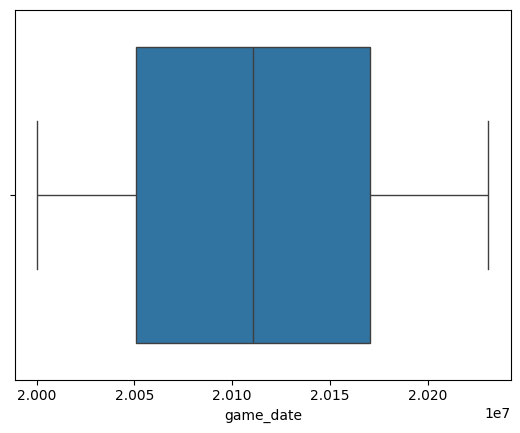

c:\Users\Hung Bui\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


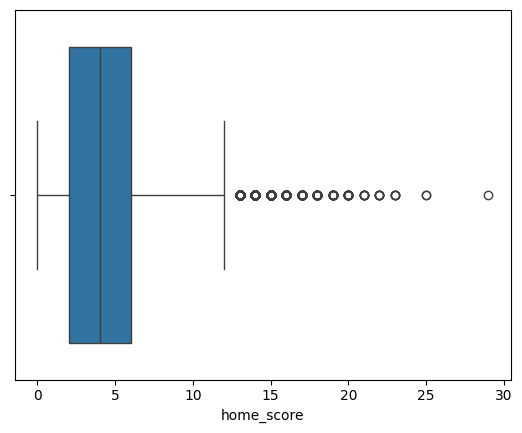

c:\Users\Hung Bui\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


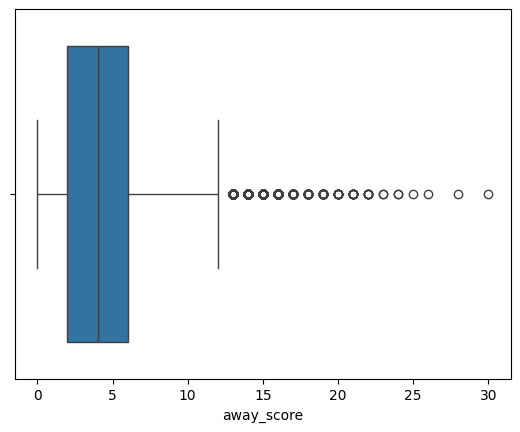

c:\Users\Hung Bui\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


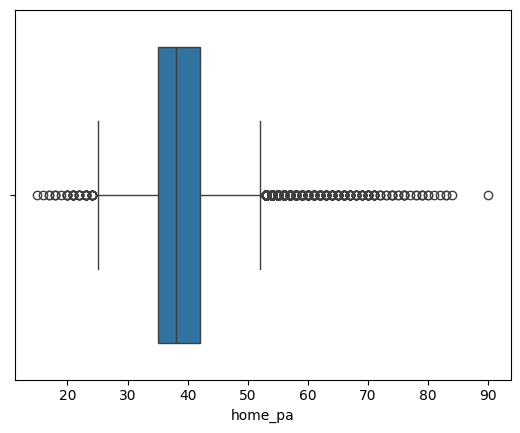

c:\Users\Hung Bui\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


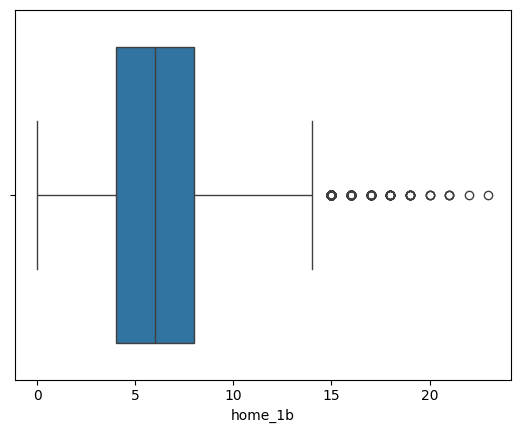

c:\Users\Hung Bui\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


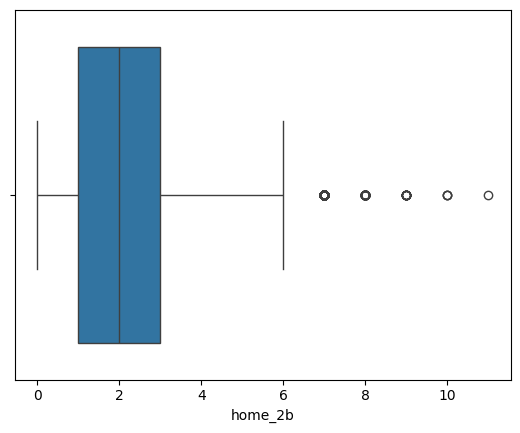

c:\Users\Hung Bui\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


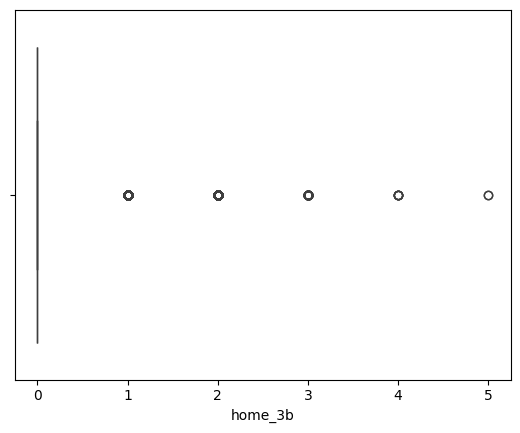

c:\Users\Hung Bui\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


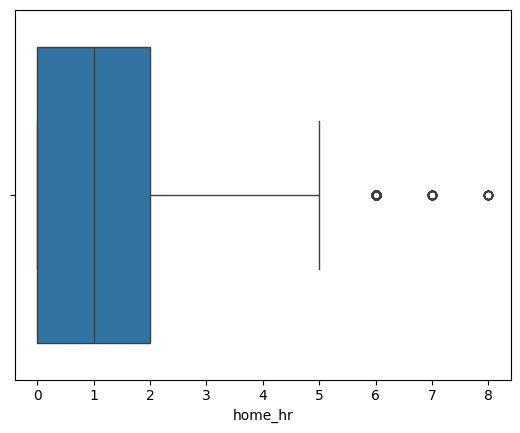

c:\Users\Hung Bui\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


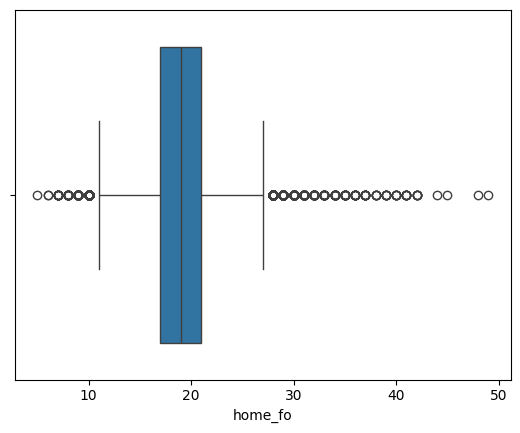

c:\Users\Hung Bui\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


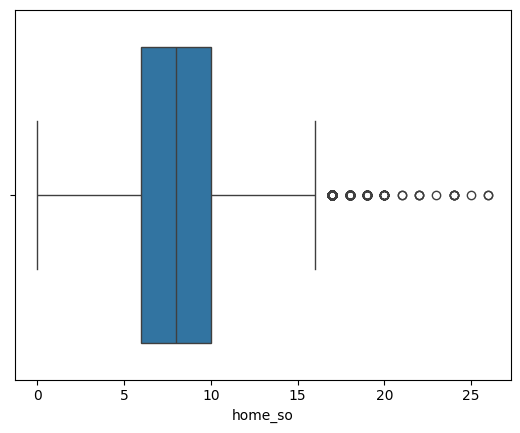

c:\Users\Hung Bui\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


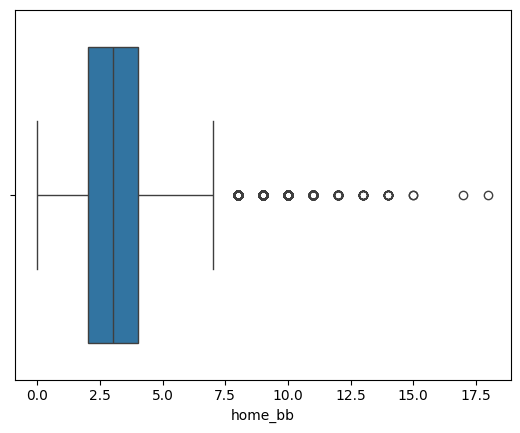

c:\Users\Hung Bui\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


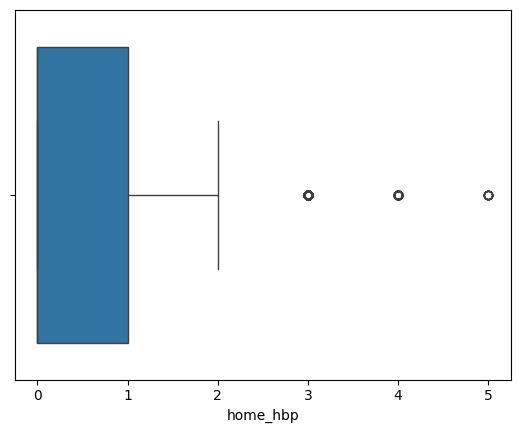

c:\Users\Hung Bui\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


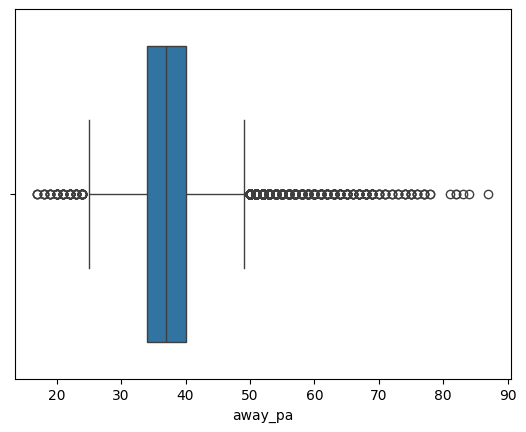

c:\Users\Hung Bui\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


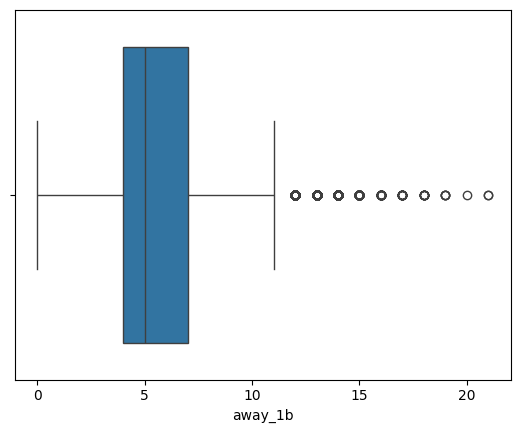

c:\Users\Hung Bui\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


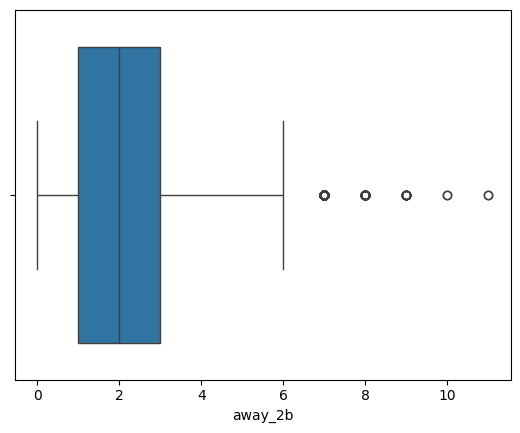

c:\Users\Hung Bui\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


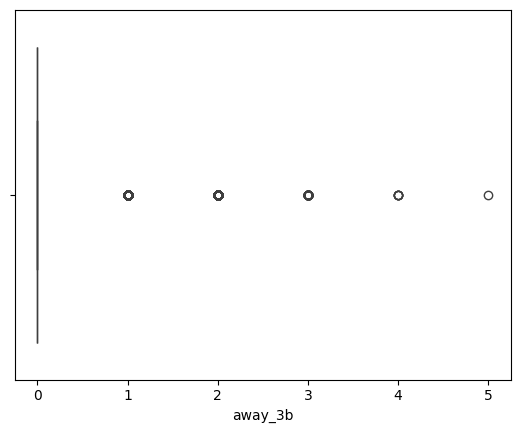

c:\Users\Hung Bui\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


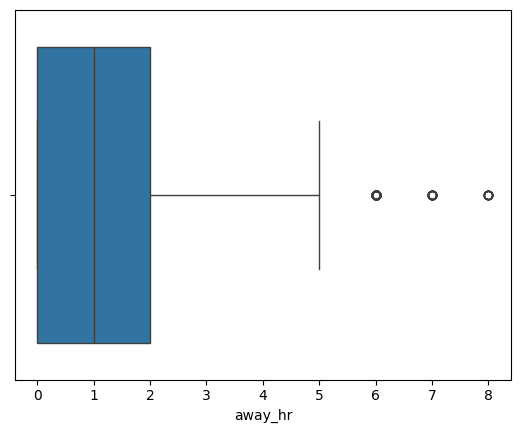

c:\Users\Hung Bui\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


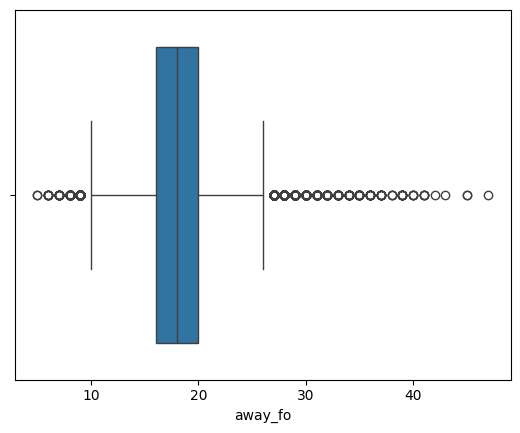

c:\Users\Hung Bui\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


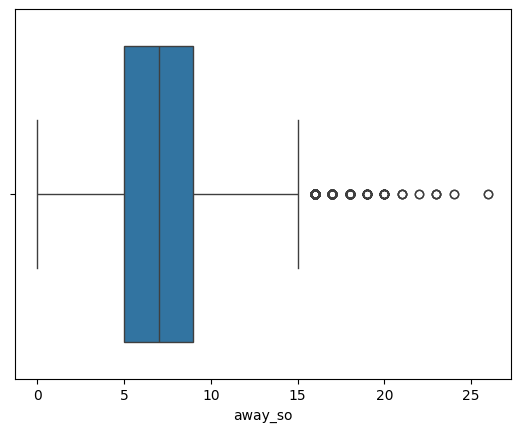

c:\Users\Hung Bui\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


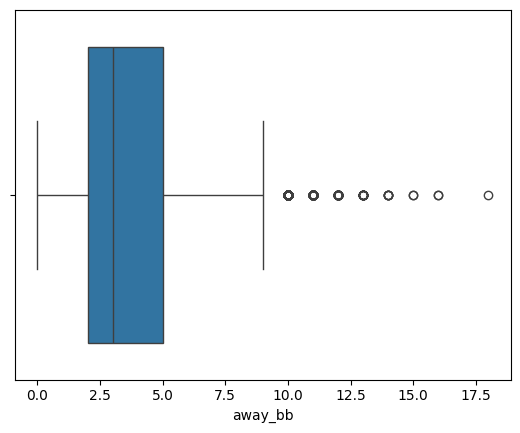

c:\Users\Hung Bui\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


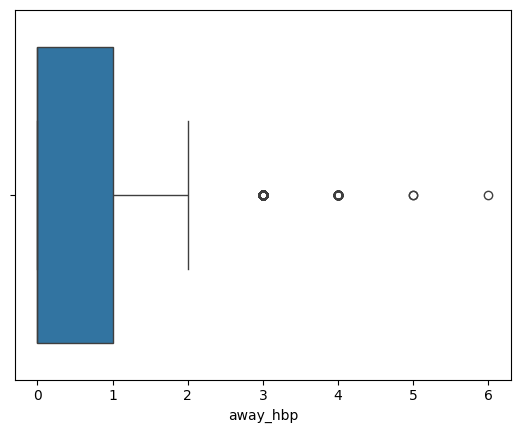

In [8]:
for i in numeric.columns:
    sns.boxplot(x=numeric[i], )
    plt.show()

In [14]:
# profile = ProfileReport(astro_df, title="Exploratory Data Analysis")

In [15]:
# profile.to_notebook_iframe()

In [68]:
astro_df

,game_date,home_team,away_team,is_day_game,home_score,away_score,venue,venue_name,city,state,home_pa,home_1b,home_2b,home_3b,home_hr,home_fo,home_so,home_bb,home_hbp,away_pa,away_1b,away_2b,away_3b,away_hr,away_fo,away_so,away_bb,away_hbp,home_obp,away_obp,home_restdays,away_restdays,home_distancetravelled,away_distancetravelled
2,2000-04-03,ATL,COL,True,2,0,ATL02,Turner Field,Atlanta,GA,34,4,2,0,0,19,7,2,0,32,5,0,0,2,17,6,1,1,0.235294,0.281250,0,0,0.000000,0.0
3,2000-04-03,CIN,MIL,True,3,3,CIN08,Cinergy Field,Cincinnati,OH,27,6,1,0,0,14,1,5,0,20,3,1,0,1,10,4,1,0,0.444444,0.300000,0,0,0.000000,0.0
4,2000-04-03,FLO,SFN,False,6,4,MIA01,Sun Life Stadium,Miami,FL,36,5,2,2,1,17,8,1,0,38,9,3,0,0,17,7,1,1,0.305556,0.368421,0,0,0.000000,0.0
5,2000-04-03,MON,LAN,False,4,10,MON02,Stade Olympique,Montreal,QUE,43,6,0,1,2,26,4,4,0,38,7,0,0,2,19,8,2,0,0.302326,0.289474,0,0,0.000000,0.0
6,2000-04-03,NYN,SDN,True,2,1,NYC17,Shea Stadium,New York,NY,33,4,0,0,1,19,8,0,1,30,2,1,0,1,16,7,2,1,0.181818,0.233333,4,0,9416.710688,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56770,2023-10-01,CHA,SDN,True,1,2,CHI12,Guaranteed Rate Field;U.S. Cellular Field,Chicago,IL,44,6,1,0,0,22,8,7,0,44,7,0,0,0,17,16,3,1,0.318182,0.250000,0,0,0.000000,0.0
56771,2023-10-01,DET,CLE,True,5,2,DET05,Comerica Park,Detroit,MI,34,3,1,0,1,20,8,1,0,38,4,4,0,1,16,7,6,0,0.176471,0.394737,0,0,0.000000,0.0
56772,2023-10-01,KCA,NYA,True,5,2,KAN06,Kauffman Stadium,Kansas City,MO,35,4,3,0,0,18,7,3,0,35,7,0,1,3,15,8,1,0,0.285714,0.342857,0,0,0.000000,0.0
56773,2023-10-01,SEA,TEX,True,1,0,SEA03,Safeco Field,Seattle,WA,30,3,1,0,0,15,11,0,0,30,4,0,0,0,14,10,1,1,0.133333,0.200000,0,0,0.000000,0.0


In [93]:
# Drop unnecessary columns
columns_to_drop = ['game_date', 'venue', 'venue_name', 'state', 'city']

astro_df.drop(columns_to_drop, axis=1, inplace=True)

In [94]:
astro_df

,home_team,away_team,is_day_game,home_score,away_score,home_pa,home_1b,home_2b,home_3b,home_hr,home_fo,home_so,home_bb,home_hbp,away_pa,away_1b,away_2b,away_3b,away_hr,away_fo,away_so,away_bb,away_hbp,home_ops,away_ops,home_restdays,away_restdays,home_distancetravelled,away_distancetravelled
2,ATL,COL,True,2,0,34,4,2,0,0,19,7,2,0,32,5,0,0,2,17,6,1,1,0.485294,0.714583,0,0,0.000000,0.0
3,CIN,MIL,True,3,3,27,6,1,0,0,14,1,5,0,20,3,1,0,1,10,4,1,0,0.808081,0.773684,0,0,0.000000,0.0
4,FLO,SFN,False,6,4,36,5,2,2,1,17,8,1,0,38,9,3,0,0,17,7,1,1,0.848413,0.785088,0,0,0.000000,0.0
5,MON,LAN,False,4,10,43,6,0,1,2,26,4,4,0,38,7,0,0,2,19,8,2,0,0.738223,0.706140,0,0,0.000000,0.0
6,NYN,SDN,True,2,1,33,4,0,0,1,19,8,0,1,30,2,1,0,1,16,7,2,1,0.431818,0.529630,4,0,9416.710688,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56770,CHA,SDN,True,1,2,44,6,1,0,0,22,8,7,0,44,7,0,0,0,17,16,3,1,0.534398,0.425000,0,0,0.000000,0.0
56771,DET,CLE,True,5,2,34,3,1,0,1,20,8,1,0,38,4,4,0,1,16,7,6,0,0.449198,0.894737,0,0,0.000000,0.0
56772,KCA,NYA,True,5,2,35,4,3,0,0,18,7,3,0,35,7,0,1,3,15,8,1,0,0.598214,0.989916,0,0,0.000000,0.0
56773,SEA,TEX,True,1,0,30,3,1,0,0,15,11,0,0,30,4,0,0,0,14,10,1,1,0.300000,0.342857,0,0,0.000000,0.0


### Stack Home and Away Teams


In [95]:
home_cols = ['home_team', 'home_score', 'home_pa', 'home_1b', 
             'home_2b', 'home_3b', 'home_hr', 'home_fo', 'home_so',
            'home_bb', 'home_hbp', 'is_day_game', 'home_restdays', 'home_distancetravelled', "home_ops"]

away_cols = ['away_team', 'away_score', 'away_pa', 'away_1b', 
             'away_2b', 'away_3b', 'away_hr', 'away_fo', 'away_so',
            'away_bb', 'away_hbp', 'is_day_game', 'away_restdays', 'away_distancetravelled ', "away_ops"]

In [96]:
home_df = astro_df[home_cols]
away_df = astro_df[away_cols]

In [97]:
# Add away team identifier
home_df.insert(0, 'is_away', 0)

In [98]:
away_df.insert(0, 'is_away', 1)

In [99]:
away_df

,is_away,away_team,away_score,away_pa,away_1b,away_2b,away_3b,away_hr,away_fo,away_so,away_bb,away_hbp,is_day_game,away_restdays,away_distancetravelled,away_ops
2,1,COL,0,32,5,0,0,2,17,6,1,1,True,0,0.0,0.714583
3,1,MIL,3,20,3,1,0,1,10,4,1,0,True,0,0.0,0.773684
4,1,SFN,4,38,9,3,0,0,17,7,1,1,False,0,0.0,0.785088
5,1,LAN,10,38,7,0,0,2,19,8,2,0,False,0,0.0,0.706140
6,1,SDN,1,30,2,1,0,1,16,7,2,1,True,0,0.0,0.529630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56770,1,SDN,2,44,7,0,0,0,17,16,3,1,True,0,0.0,0.425000
56771,1,CLE,2,38,4,4,0,1,16,7,6,0,True,0,0.0,0.894737
56772,1,NYA,2,35,7,0,1,3,15,8,1,0,True,0,0.0,0.989916
56773,1,TEX,0,30,4,0,0,0,14,10,1,1,True,0,0.0,0.342857


In [103]:
home_df = home_df.rename(columns={'home_team':'team', 'home_score':'score', 'home_pa':'pa', 'home_1b':'singles',
                       'home_2b': 'doubles', 'home_3b': 'triples', 'home_hr':'homeruns', 'home_fo':'field_outs',
                       'home_so':'strikeouts', 'home_bb':'num_walks', 'home_hbp':'hit_by_pitches', 'home_distancetravelled':'distancetravelled', "home_restdays":"restdays", "home_ops":"ops"})

In [104]:
away_df = away_df.rename(columns={'away_team':'team', 'away_score':'score', 'away_pa':'pa', 'away_1b':'singles',
                       'away_2b': 'doubles', 'away_3b': 'triples', 'away_hr':'homeruns', 'away_fo':'field_outs',
                       'away_so':'strikeouts', 'away_bb':'num_walks', 'away_hbp':'hit_by_pitches', 'away_distancetravelled ':'distancetravelled', "away_restdays":"restdays", "away_ops":"ops"})

In [105]:
home_df

,is_away,team,score,pa,singles,doubles,triples,homeruns,field_outs,strikeouts,num_walks,hit_by_pitches,is_day_game,restdays,distancetravelled,ops
2,0,ATL,2,34,4,2,0,0,19,7,2,0,True,0,0.000000,0.485294
3,0,CIN,3,27,6,1,0,0,14,1,5,0,True,0,0.000000,0.808081
4,0,FLO,6,36,5,2,2,1,17,8,1,0,False,0,0.000000,0.848413
5,0,MON,4,43,6,0,1,2,26,4,4,0,False,0,0.000000,0.738223
6,0,NYN,2,33,4,0,0,1,19,8,0,1,True,4,9416.710688,0.431818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56770,0,CHA,1,44,6,1,0,0,22,8,7,0,True,0,0.000000,0.534398
56771,0,DET,5,34,3,1,0,1,20,8,1,0,True,0,0.000000,0.449198
56772,0,KCA,5,35,4,3,0,0,18,7,3,0,True,0,0.000000,0.598214
56773,0,SEA,1,30,3,1,0,0,15,11,0,0,True,0,0.000000,0.300000


In [106]:
stacked_df = pd.concat([home_df, away_df], ignore_index=True)
stacked_df

,is_away,team,score,pa,singles,doubles,triples,homeruns,field_outs,strikeouts,num_walks,hit_by_pitches,is_day_game,restdays,distancetravelled,ops
0,0,ATL,2,34,4,2,0,0,19,7,2,0,True,0,0.000000,0.485294
1,0,CIN,3,27,6,1,0,0,14,1,5,0,True,0,0.000000,0.808081
2,0,FLO,6,36,5,2,2,1,17,8,1,0,False,0,0.000000,0.848413
3,0,MON,4,43,6,0,1,2,26,4,4,0,False,0,0.000000,0.738223
4,0,NYN,2,33,4,0,0,1,19,8,0,1,True,4,9416.710688,0.431818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113525,1,SDN,2,44,7,0,0,0,17,16,3,1,True,0,0.000000,0.425000
113526,1,CLE,2,38,4,4,0,1,16,7,6,0,True,0,0.000000,0.894737
113527,1,NYA,2,35,7,0,1,3,15,8,1,0,True,0,0.000000,0.989916
113528,1,TEX,0,30,4,0,0,0,14,10,1,1,True,0,0.000000,0.342857


In [107]:
stacked_df.to_csv("./../data/processed/stacked_df_cleaned.csv")